In [332]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [333]:
# import warnings
# warnings.filterwarnings('ignore')

In [334]:
data = pd.read_csv('./weatherAUS.csv')

In [335]:
PLOT = False

# 1. Analisis exploratorio de datos.

In [336]:
data.shape

(145460, 23)

#### Previsualizacion los datos.

In [337]:
pd.set_option('display.max_columns', None)

In [338]:
data.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
62147,23/09/2011,Sale,11.4,15.2,0.0,7.4,7.3,W,93.0,W,W,35.0,31.0,63.0,46.0,1018.2,1019.7,4.0,3.0,12.9,13.4,No,No
5498,23/12/2015,BadgerysCreek,15.0,24.8,0.0,NaN,NaN,E,30.0,SSE,ESE,9.0,15.0,75.0,60.0,1019.8,1017.3,NaN,NaN,20.7,23.0,No,No
92466,04/04/2015,GoldCoast,21.9,27.5,5.0,NaN,NaN,E,35.0,SW,NE,7.0,9.0,88.0,76.0,1014.9,1010.3,NaN,NaN,24.8,26.0,Yes,Yes
73880,22/06/2014,Nhil,7.2,14.0,0.6,NaN,NaN,NNE,39.0,N,N,2.0,19.0,93.0,79.0,1021.4,1016.7,NaN,NaN,8.0,13.3,No,No
103967,15/01/2013,Nuriootpa,12.1,32.7,0.0,6.4,13.0,NNE,33.0,NE,WNW,17.0,11.0,35.0,8.0,1015.7,1013.3,2.0,3.0,20.3,30.7,No,No
87066,12/02/2017,Brisbane,22.7,37.6,0.0,10.2,11.7,NNE,28.0,NNE,NE,4.0,15.0,53.0,52.0,1005.8,1000.1,1.0,1.0,30.9,33.8,No,No
38813,02/07/2015,WaggaWagga,2.7,12.2,0.0,1.6,2.2,WSW,54.0,NNW,WSW,7.0,37.0,83.0,77.0,1023.9,1022.3,7.0,7.0,6.3,9.4,No,No
131719,22/11/2013,Hobart,9.2,19.9,8.8,0.8,0.9,SSW,37.0,NNW,ESE,13.0,22.0,72.0,75.0,1009.9,1007.5,NaN,NaN,14.7,18.1,Yes,Yes
132318,14/07/2015,Hobart,5.1,9.7,0.4,1.8,3.4,SW,39.0,NW,SSW,9.0,17.0,60.0,50.0,1006.8,1006.1,6.0,7.0,6.2,8.7,No,No
128544,10/12/2013,Walpole,9.3,19.8,0.0,NaN,NaN,SSE,35.0,SSE,SSE,13.0,19.0,63.0,61.0,1022.3,1020.4,NaN,NaN,17.5,18.2,No,No


In [339]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Solo las variables Date y Location contienen la totalidad de los datos. 

In [340]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent'])

In [341]:
missing_percentage(data)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [342]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

##### Propiedades estadísticas del conjunto de datos.

In [343]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# 2. Analisis univariado.

### Exploracion de la variable objetivo RainTomorrow.

In [344]:
data['RainTomorrow'].isnull().sum()

3267

Hay 3267 valores faltantes en la variable objetivo.

In [345]:
data['RainTomorrow'].nunique()

2

In [346]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

**Distribución de frecuencia de los valores:**

In [347]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

**Porcentaje de distribución de frecuencia de valores:**

In [348]:
data['RainTomorrow'].value_counts()/len(data)

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

**Visualizacion de la distribución de frecuencias de la variable RainTomorrow:**

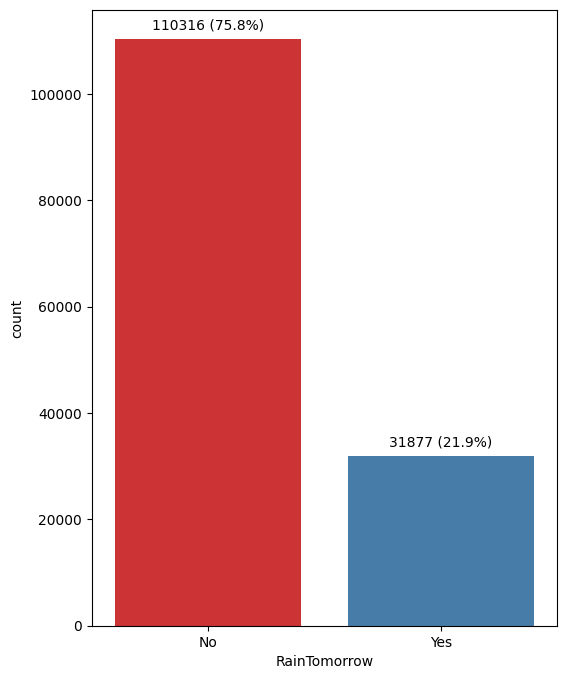

In [349]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 3. Analisis bivariado.

## 3.0 Declaracion de funciones.

In [350]:
def get_dummies(df, column):
    dummies = pd.get_dummies(df[column], drop_first=True, dummy_na=True)
    return dummies

def print_missing_values(df, column, dummies):
    print(f"Summary for column: {column}")
    print(dummies.sum(axis=0))
    
    missing_values = df[column].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    missing_percentage = (missing_values / len(df)) * 100
    print(f"Missing percentage: {round(missing_percentage, 2)}%")

## 3.1 Variables categoricas.

In [351]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categoical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values. \t {data[col].nunique()} unique values.')

In [352]:
print_categoical_columns(data)

Categorical columns:
WindDir9am 	 10566 null values. 	 16 unique values.
WindGustDir 	 10326 null values. 	 16 unique values.
WindDir3pm 	 4228 null values. 	 16 unique values.
RainTomorrow 	 3267 null values. 	 2 unique values.
RainToday 	 3261 null values. 	 2 unique values.
Date 	 0 null values. 	 3436 unique values.
Location 	 0 null values. 	 49 unique values.


In [353]:
data[categorical_columns(data).values].sample(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
64821,23/09/2010,MelbourneAirport,SW,SW,WSW,No,No
117644,16/01/2009,PerthAirport,NE,NE,WNW,No,No
92639,24/09/2015,GoldCoast,SE,S,SE,No,No
97154,13/10/2010,Adelaide,W,ENE,WSW,Yes,No
60542,25/09/2015,Bendigo,SE,SSE,ESE,No,No
43949,02/11/2012,Wollongong,SSW,S,SSE,No,Yes
40738,15/05/2012,Williamtown,WNW,WNW,S,No,No
6023,31/05/2017,BadgerysCreek,SW,SW,S,No,No
7542,02/05/2013,Cobar,SSE,SSE,S,No,No
559,13/06/2010,Albury,ESE,NNW,SSE,No,No


De las variables categorias, 2 de ellas son binarias: RainToday y RainTomorrow (variable objetivo).

### Exploracion de variables categóricas.

**Recuento de frecuencia de variables categóricas.**

In [354]:
for var in data[categorical_columns(data).values]:     
    print(data[var].value_counts())

Date
12/11/2013    49
01/09/2014    49
23/08/2014    49
24/08/2014    49
25/08/2014    49
              ..
29/11/2007     1
28/11/2007     1
27/11/2007     1
26/11/2007     1
31/01/2008     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

Distribución de frecuencias de las variables categóricas:

In [355]:
for var in data[categorical_columns(data).values]:    
    print(data[var].value_counts()/np.float64(len(data)))

Date
12/11/2013    0.000337
01/09/2014    0.000337
23/08/2014    0.000337
24/08/2014    0.000337
25/08/2014    0.000337
                ...   
29/11/2007    0.000007
28/11/2007    0.000007
27/11/2007    0.000007
26/11/2007    0.000007
31/01/2008    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

### Cardinalidad.

Analisis de variables que puedan tener alta cardinalidad.

In [356]:
max_length = max(len(var) for var in data[categorical_columns(data).values])

for var in data[categorical_columns(data).values]:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} labels.')

Date         	3436 labels.
Location     	49 labels.
WindGustDir  	17 labels.
WindDir9am   	17 labels.
WindDir3pm   	17 labels.
RainToday    	3 labels.
RainTomorrow 	3 labels.


### 3.1.1 Variable Date.

Extraccion de valores Year, Month, and Day de la variable Date en nuevas columnas.

In [357]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [359]:
data.drop('Date', axis=1, inplace = True)

In [360]:
print_categoical_columns(data)

Categorical columns:
WindDir9am 	 10566 null values. 	 16 unique values.
WindGustDir 	 10326 null values. 	 16 unique values.
WindDir3pm 	 4228 null values. 	 16 unique values.
RainTomorrow 	 3267 null values. 	 2 unique values.
RainToday 	 3261 null values. 	 2 unique values.
Location 	 0 null values. 	 49 unique values.


In [361]:
data.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
80748,Watsonia,4.4,16.4,3.6,3.6,10.4,W,24.0,WNW,SSW,11.0,15.0,71.0,52.0,1020.2,1020.0,1.0,5.0,9.9,15.4,Yes,No,2016,10,19
82080,Dartmoor,15.2,24.4,0.0,11.2,10.0,S,39.0,S,S,19.0,20.0,99.0,44.0,1017.0,1017.1,NaN,NaN,15.3,22.8,No,No,2012,1,18
110247,Albany,9.6,19.2,0.6,3.4,5.0,NaN,NaN,NW,W,11.0,19.0,69.0,51.0,1018.0,1017.1,7.0,5.0,14.0,18.7,No,No,2013,10,1
23108,NorfolkIsland,13.9,20.2,0.4,2.2,7.7,ENE,35.0,ENE,NE,19.0,20.0,82.0,77.0,1020.7,1018.2,2.0,6.0,17.4,18.8,No,No,2014,9,10
29416,Richmond,6.1,20.5,0.0,NaN,NaN,NNE,19.0,WSW,SW,2.0,7.0,98.0,65.0,1024.2,1020.1,8.0,8.0,8.6,19.7,No,No,2015,5,28
33376,Sydney,20.8,27.1,4.4,0.0,6.0,S,50.0,S,SE,30.0,22.0,70.0,56.0,1013.2,1013.9,7.0,7.0,23.1,25.4,Yes,No,2017,2,2
20441,NorahHead,9.8,15.2,0.0,NaN,NaN,SSE,33.0,SW,S,15.0,22.0,53.0,61.0,1020.5,1020.7,NaN,NaN,12.9,14.7,No,No,2015,8,18
62234,Sale,16.7,24.2,6.6,3.4,5.1,W,43.0,SW,SW,11.0,19.0,92.0,73.0,1004.9,NaN,6.0,8.0,19.0,21.2,Yes,Yes,2011,12,19
62496,Sale,8.7,19.9,0.6,7.4,9.2,WSW,76.0,NW,NW,24.0,39.0,52.0,40.0,1001.3,1001.6,8.0,8.0,17.1,18.7,No,Yes,2012,9,6
127401,Walpole,7.5,17.2,0.0,NaN,NaN,N,30.0,NNE,NNW,13.0,11.0,73.0,53.0,1027.3,1022.5,NaN,NaN,10.1,16.5,No,No,2010,7,24


### 3.1.2 Variable Location.

Distribución de frecuencia de los valores en la variable Location.

In [362]:
data.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [363]:
# One Hot Encoding.
dummies = get_dummies(data, 'Location')
dummies.sample(10)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,NaN
108569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
93687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
20744,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
320,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46559,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58941,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
123322,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3700,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [364]:
print_missing_values(data, 'Location', dummies)

Summary for column: Location
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3

### 3.1.3 Variable de WindGustDir.

In [365]:
data.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [366]:
# One Hot Encoding
dummies = get_dummies(data, 'WindGustDir')
dummies.sample(10)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
97630,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
140549,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142160,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
46322,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
80533,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
83644,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
38528,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
59510,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
54416,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
33730,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [367]:
print_missing_values(data, 'WindGustDir', dummies)

Summary for column: WindGustDir
ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64
Missing values: 10326
Missing percentage: 7.1%


### 3.1.4 Variable de WindDir9am.

In [368]:
columm = 'WindDir9am'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir9am
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64
Missing values: 10566
Missing percentage: 7.26%


### 3.1.4 Variable de WindDir3pm.

In [369]:
columm = 'WindDir9am'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir9am
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64
Missing values: 10566
Missing percentage: 7.26%


### 3.1.4 Variable de RainToday.

In [370]:
columm = 'RainToday'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: RainToday
Yes    31880
NaN     3261
dtype: int64
Missing values: 3261
Missing percentage: 2.24%


## 3.2 Variables numericas.

In [371]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [372]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


In [373]:
data[numerical_columns(data).values].sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
101377,11.7,25.3,0.2,3.4,1.5,41.0,17.0,24.0,66.0,35.0,1020.1,1016.6,7.0,7.0,18.7,24.9
127778,11.0,14.9,0.2,NaN,NaN,39.0,20.0,17.0,68.0,68.0,1036.8,1035.7,NaN,NaN,12.5,14.3
64419,7.4,15.3,5.0,4.0,8.4,61.0,28.0,26.0,62.0,30.0,1015.7,1018.7,2.0,6.0,10.7,15.0
114575,6.2,17.2,0.2,NaN,NaN,20.0,9.0,7.0,82.0,60.0,1021.5,1019.3,NaN,NaN,12.8,16.6
4518,12.0,23.2,0.2,NaN,NaN,22.0,13.0,13.0,81.0,67.0,1017.0,1013.9,NaN,NaN,17.3,20.6
90770,12.9,23.6,0.0,NaN,NaN,35.0,9.0,17.0,51.0,46.0,1015.9,1013.7,NaN,NaN,19.4,22.6
39756,3.8,23.8,0.0,1.8,10.2,NaN,11.0,30.0,83.0,30.0,1017.3,1010.5,6.0,4.0,12.3,22.5
143165,13.2,31.5,0.0,6.8,NaN,35.0,11.0,24.0,64.0,36.0,1018.2,1014.4,2.0,1.0,21.2,30.6
94649,20.0,28.3,0.0,8.2,2.1,30.0,11.0,17.0,63.0,59.0,1017.4,1015.6,6.0,7.0,25.1,25.7
60277,23.9,40.3,0.0,NaN,NaN,65.0,20.0,43.0,38.0,16.0,1014.4,1007.5,NaN,NaN,27.4,38.6


Todas las variables numéricas son de tipo continuo.

## 3.3 Inspeccion de valores atipicos.

In [374]:
print(round(data[numerical_columns(data).values].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Las columnas Rainfall, Evaporation, WindSpeed9am y WindSpeed3pm pueden contener valores atípicos.

### 3.3.1 Diagramas boxplot y QQ-Plot

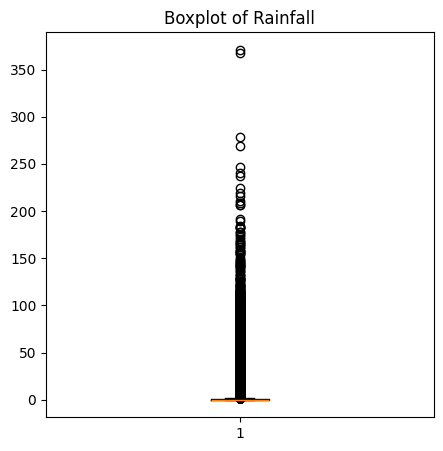

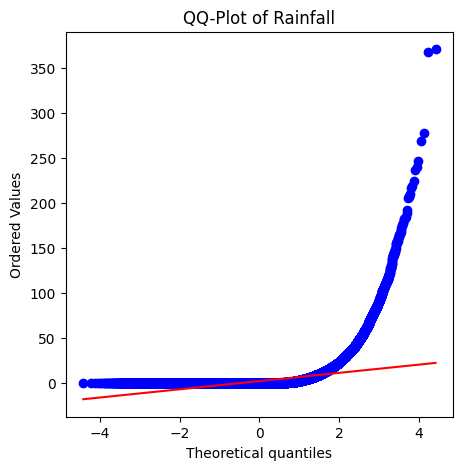

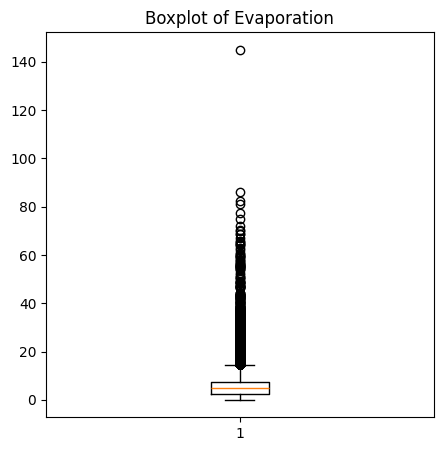

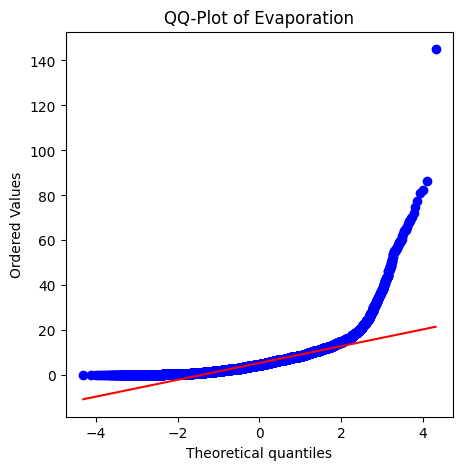

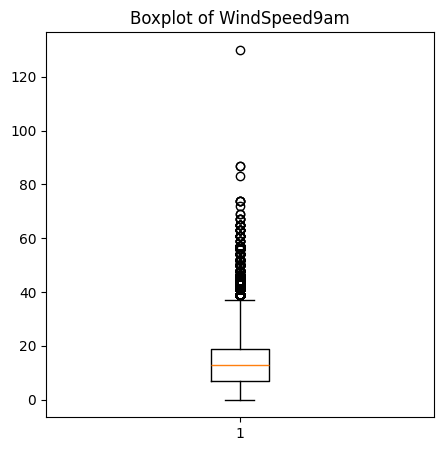

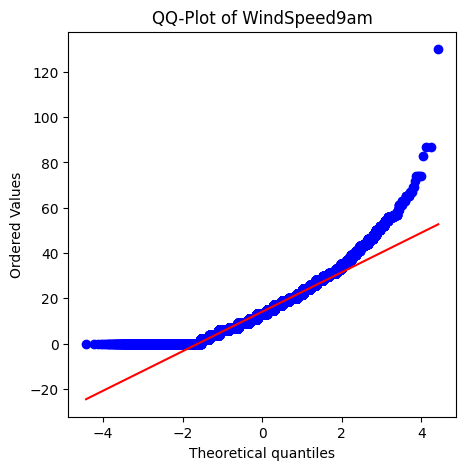

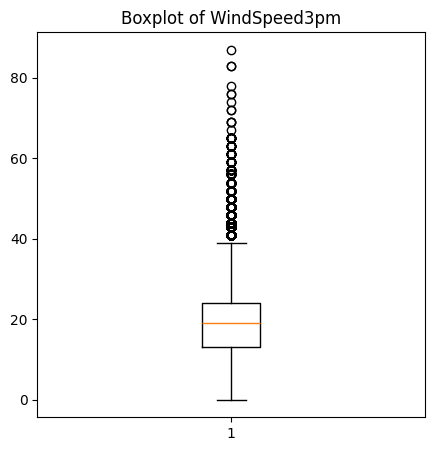

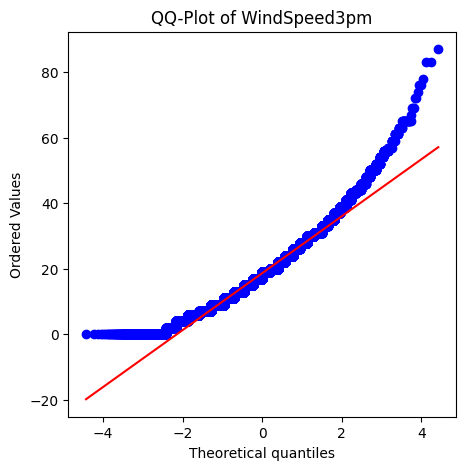

In [375]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def draw_boxplot(df, column):
    plt.figure(figsize=(5, 5))
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()

def draw_qqplot(df, column):
    plt.figure(figsize=(5, 5))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')
    plt.show()

columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for col in columns:
    draw_boxplot(data, col)
    draw_qqplot(data, col)

## 3.4 Distribución de las variables.

In [376]:
def plot_histogram(df, column, subplot_no):
    plt.subplot(2, 2, subplot_no)
    fig = df[column].hist(bins=10)
    fig.set_xlabel(column)
    fig.set_ylabel('RainTomorrow')

plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

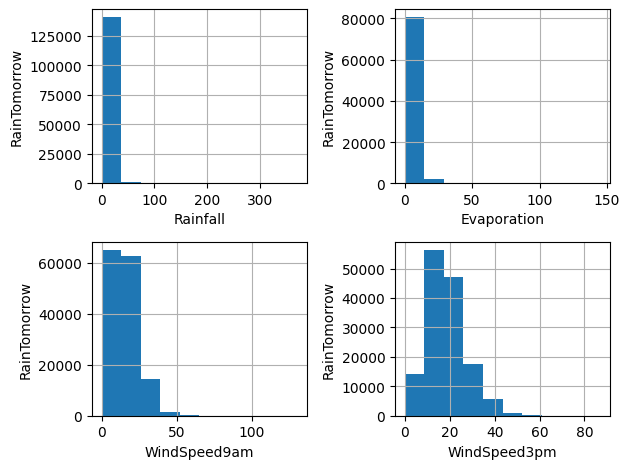

In [377]:
columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for i, col in enumerate(columns, 1):
    plot_histogram(data, col, i)

plt.tight_layout()
plt.show()

Las cuatro variables están sesgadas. 

## 3.5 Rango intercuartil para encontrar valores atípicos.

In [378]:
def print_outliers(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    Lower_fence = df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = df[column].quantile(0.75) + (IQR * 3)
    print(f'Outliers for {column}: < {round(Lower_fence, 2)} or > {round(Upper_fence, 2)}')

In [379]:
columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for col in columns:
    print_outliers(data, col)

Outliers for Rainfall: < -2.4 or > 3.2
Outliers for Evaporation: < -11.8 or > 21.8
Outliers for WindSpeed9am: < -29.0 or > 55.0
Outliers for WindSpeed3pm: < -20.0 or > 57.0


# 4. Analisis Multivariado.

## 4.1 Mapa de calor.

In [380]:
def plot_heatmap(correlation_matrix, title='Correlation Heatmap', fig_size=(16, 12), cmap='coolwarm', linecolor='white', linewidths=0.5):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(correlation_matrix, ax=ax, square=True, annot=True, fmt='.2f', linecolor=linecolor, linewidths=linewidths, cmap=cmap)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
    fig.patch.set_facecolor('silver')
    plt.show()

In [381]:
correlation = data[numerical_columns(data).values].corr()

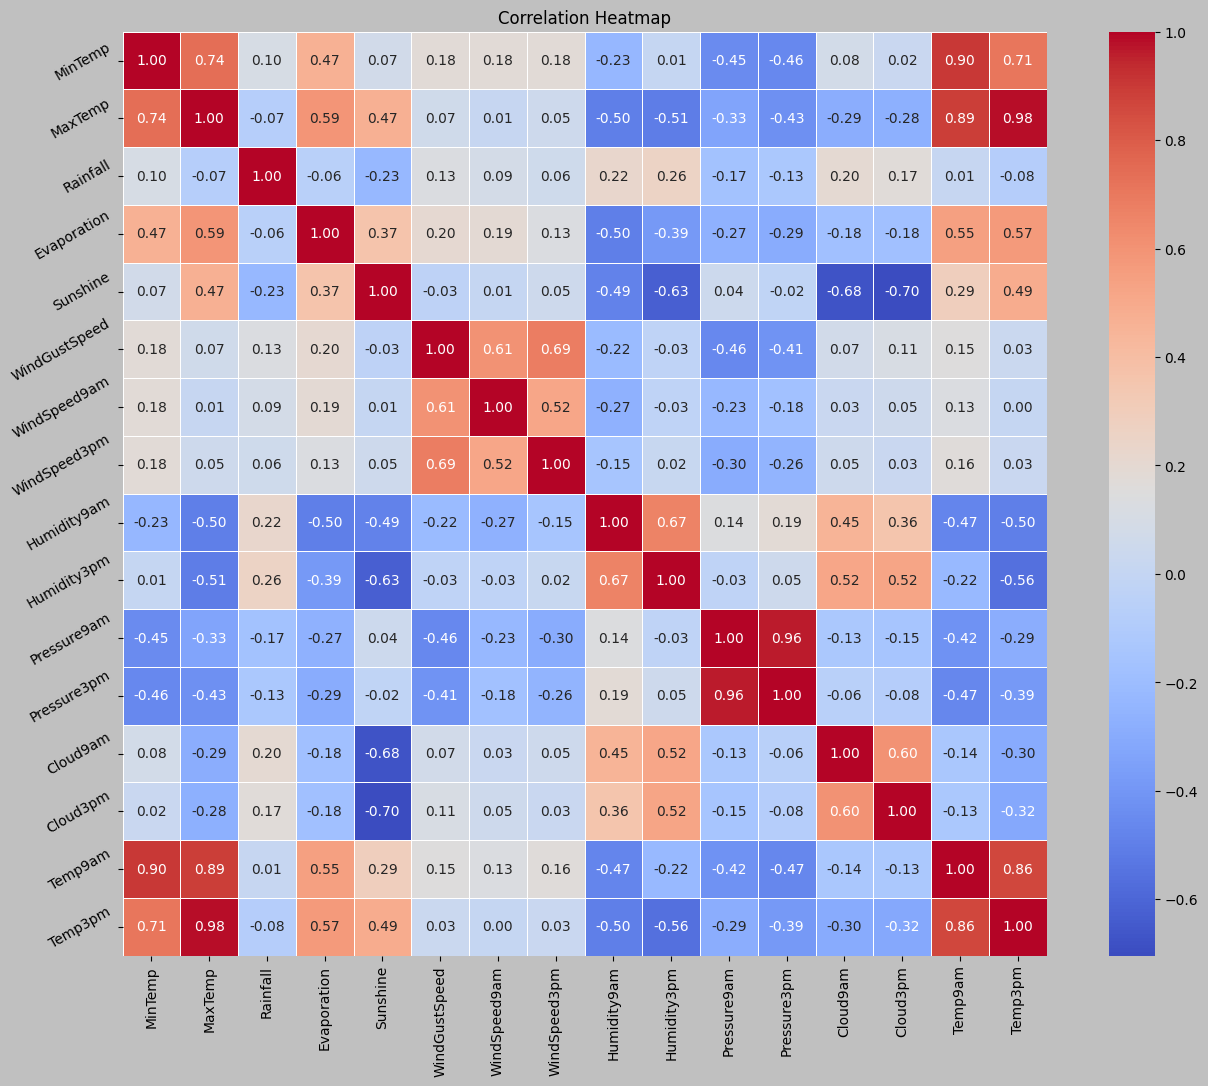

In [382]:
plot_heatmap(correlation)

Del mapa de calor de correlación anterior, podemos concluir que los siguientes pares de variables tienen una correlacion positiva y fuerte:

* Las variables MaxTemp y Temp3pm (0,98).
* Las variables Pressure9am y Pressure3pm (0,96).
* Las variables MinTemp y Temp9am (0,90).
* Las variables MaxTemp y Temp9am (0,89).
* Las variables Temp9am y Temp3pm (0,86).
* Las variables MinTemp y MaxTemp (0,74).
* Las variables MinTemp y Temp3pm (0,71).
* Las variables WindGustSpeed y WindSpeed3pm (0,69).

## 4.2 PairPlot.

In [383]:
# Positively correlated variables.
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [384]:
def plot_pairplot(df, variables, kind='scatter', diag_kind='auto'):
    sns.pairplot(df[variables], kind=kind, diag_kind=diag_kind)
    plt.show()

La gráfica de pares muestra la relación entre estas variables.

In [385]:
if PLOT:
    num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
    plot_pairplot(data, num_var)

--------------------------------------------------------------------------

In [386]:
import missingno as msno

if PLOT:
    msno.matrix(data)

In [387]:
missing_columns = data.columns[data.isnull().any()].tolist()

# Visualizar patrones de datos faltantes para cada columna
if PLOT:
    for column in missing_columns:
        print(f"Visualizing missing values in column: {column}")
        msno.matrix(data[[column]])
        plt.show()

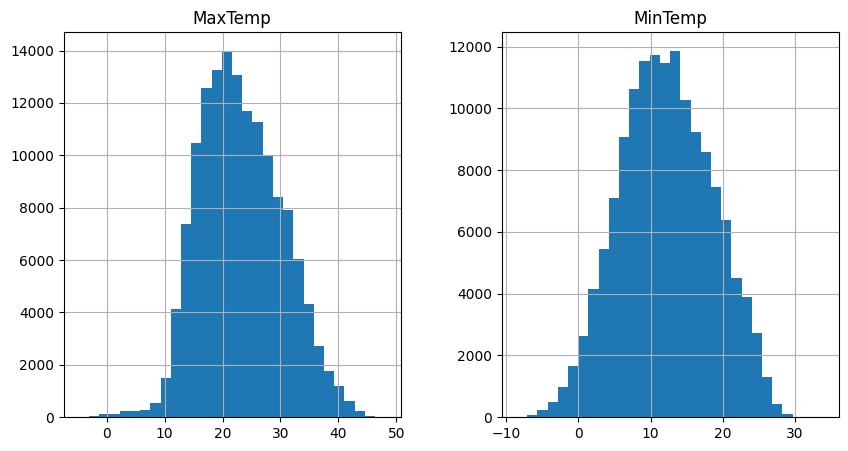

In [388]:
data[['MaxTemp', 'MinTemp']].hist(bins=30, figsize=(10, 5))
plt.show()

In [389]:
# data_encoded = encode_columns(data.copy())

In [390]:
# missing_percentage(data_encoded)

In [391]:
# data_grouped = data.groupby('Location')

# def interpolate_group(group):
#     group['MaxTemp'] = group['MaxTemp'].interpolate()
#     group['MinTemp'] = group['MinTemp'].interpolate()
#     return group

# data_imputed = data_grouped.apply(interpolate_group)

# # Verificar si aún hay datos faltantes
# print(data_imputed[['MaxTemp', 'MinTemp']].isnull().sum())

In [392]:
# missing_values = data_imputed[data_imputed[['MaxTemp', 'MinTemp']].isnull().any(axis=1)]
# print(missing_values)

In [393]:
# from sklearn.impute import SimpleImputer

# # Define una función que realiza la imputación por la media en un DataFrame
# def impute_mean(df):
#     mean_imputer = SimpleImputer(strategy='mean')
#     df[['MaxTemp', 'MinTemp']] = mean_imputer.fit_transform(df[['MaxTemp', 'MinTemp']])
#     return df

In [394]:
# data_imputed = data_imputed.reset_index(drop=True)
# data_imputed = data_imputed.groupby('Location').apply(impute_mean, include_groups=False)

In [395]:
# # Restablecer el índice del DataFrame
# data_imputed = data_imputed.reset_index(drop=True)

# # Agrupa el DataFrame por 'Location' y calcula la media de 'MaxTemp' y 'MinTemp' para cada grupo
# mean_maxtemp = data_imputed.groupby('Location')['MaxTemp'].transform('mean')
# mean_mintemp = data_imputed.groupby('Location')['MinTemp'].transform('mean')

# # Llena los valores faltantes con la media de cada grupo
# data_imputed['MaxTemp'] = data_imputed['MaxTemp'].fillna(mean_maxtemp)
# data_imputed['MinTemp'] = data_imputed['MinTemp'].fillna(mean_mintemp)

# # Verifica si aún hay datos faltantes
# print(data_imputed[['MaxTemp', 'MinTemp']].isnull().sum())

In [396]:
# missing_percentage(data_imputed)

**Comparacion:**

In [397]:
# data_imputed = data_imputed.reset_index(drop=True)
# data_grouped.sample(10)

In [398]:
# missing_percentage(data_imputed)

In [399]:


# data_imputed = encode_column(data_imputed, 'RainToday')

In [430]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            # Guardar los índices de los valores nulos
            null_indices = df[column].isnull()
            
            # Reemplazar los valores nulos con una cadena que no se encuentre en los datos
            df[column].fillna('NaN', inplace=True)
            
            # Realizar la codificación
            df[column] = le.fit_transform(df[column])
            
            # Volver a colocar los valores nulos
            df[column] = df[column].where(~null_indices, other=np.nan)
    return df

In [484]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_mice(df, columns, max_iter=10, random_state=0):
    mice_imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    
    # Realizamos la imputación en las columnas seleccionadas
    df[columns] = mice_imputer.fit_transform(df[columns])
    
    return df

In [402]:
from sklearn.ensemble import RandomForestClassifier

def impute_with_rf(df, column):
    rf = RandomForestClassifier(n_estimators=100)

    # Divide los datos en conjuntos con y sin valores faltantes en la columna objetivo
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]

    # Entrena el clasificador de bosque aleatorio
    rf.fit(train_data.drop(column, axis=1), train_data[column])

    # Imputa los valores faltantes en la columna objetivo
    df.loc[df[column].isnull(), column] = rf.predict(test_data.drop(column, axis=1))

    return df

In [488]:
data_grouped = data.groupby('Location')

In [404]:
if PLOT:
    fig, axs = plt.subplots(len(data_grouped), 2, figsize=(10, 5*len(data_grouped)))

    for (location, group), ax_row in zip(data_grouped, axs):
        group[['MaxTemp', 'MinTemp']].hist(bins=30, ax=ax_row)
        for ax, column in zip(ax_row, ['MaxTemp', 'MinTemp']):
            ax.set_title(f'Histogram of {column} for {location}')
            ax.set_xlabel('Temperature')
            ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [493]:
data_encoded = data_grouped.apply(encode_columns, include_groups=False)

In [469]:
data_encoded.sample(10)

,,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,,,,,,,,,,,,,,,,,,,,,,,,,
Woomera,106203,15.2,30.6,0.0,10.6,7.9,12.0,41.0,2.0,13.0,15.0,13.0,38.0,25.0,1018.4,1016.2,0.0,0.0,21.7,29.2,1.0,1.0,2010,10,4
Darwin,141363,23.7,30.4,104.8,6.2,1.3,12.0,30.0,2.0,9.0,13.0,15.0,96.0,68.0,1010.7,1006.9,8.0,7.0,25.0,28.9,1.0,1.0,2014,11,28
Melbourne,68352,7.1,20.9,0.0,6.6,9.1,3.0,61.0,3.0,3.0,46.0,28.0,43.0,29.0,1023.3,1018.3,5.0,7.0,14.5,19.6,1.0,1.0,2011,9,26
Tuggeranong,49547,1.3,19.2,0.0,NaN,NaN,5.0,22.0,NaN,6.0,0.0,11.0,93.0,52.0,1023.5,1019.4,NaN,NaN,7.9,18.9,1.0,1.0,2010,5,9
Melbourne,69935,NaN,NaN,NaN,3.2,7.8,11.0,37.0,13.0,10.0,15.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,3,25
Canberra,47517,3.6,21.0,0.0,2.4,NaN,7.0,33.0,6.0,6.0,7.0,22.0,NaN,35.0,1027.8,1022.7,0.0,NaN,NaN,20.6,1.0,1.0,2013,5,12
GoldCoast,90678,21.2,30.6,0.0,NaN,NaN,5.0,41.0,3.0,5.0,13.0,33.0,59.0,61.0,1015.2,1012.0,NaN,NaN,27.5,28.9,1.0,1.0,2010,2,12
Darwin,139699,25.6,33.3,1.0,5.8,11.1,15.0,39.0,14.0,15.0,15.0,28.0,71.0,63.0,1011.1,1008.8,3.0,6.0,30.2,32.6,0.0,1.0,2010,2,9
Bendigo,58196,16.3,26.3,0.0,9.6,NaN,12.0,48.0,13.0,13.0,30.0,22.0,46.0,21.0,1007.6,1010.3,1.0,0.0,17.9,24.5,1.0,1.0,2009,1,24


In [470]:
print_categoical_columns(data_encoded)
print()
print_numerical_columns(data_encoded)

Categorical columns:

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindDir9am 	 10566 null values.
WindGustDir 	 10326 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
WindDir3pm 	 4228 null values.
Temp3pm 	 3609 null values.
RainTomorrow 	 3267 null values.
Rainfall 	 3261 null values.
RainToday 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


In [494]:
missing_percentage(data_encoded)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [480]:
print(data[data['MinTemp'] > data['MaxTemp']])

Empty DataFrame
Columns: [Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


In [491]:
print(data_encoded[data_encoded['MinTemp'] > data_encoded['MaxTemp']])

Empty DataFrame
Columns: [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


Con el objetivo de utilizar la mayor cantidad de datos reales, iniciamos la Imputacion de datos primero a aquellas columnas con menor cantidad de datos faltantes.

In [583]:
data_imputed = data_encoded.copy()

In [584]:
columns = ['MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm']
data_imputed = impute_mice(data_imputed, columns, max_iter=75)

In [562]:
print(data_imputed[data_imputed['MinTemp'] > data_imputed['MaxTemp']])

Empty DataFrame
Columns: [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Year, Month, Day]
Index: []


In [578]:
missing_percentage(data_imputed)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [461]:
data_imputed.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
44928,47,12.3,16.8,0.0,NaN,NaN,3.0,37.0,12.0,0.0,9.0,7.0,71.0,76.0,1025.1,1021.8,8.0,7.0,14.6,15.6,1.0,1.0,2015,9,6
38793,42,2.0,16.0,0.0,1.8,9.0,2.0,17.0,0.0,9.0,13.0,4.0,79.0,56.0,1035.1,1031.4,2.0,7.0,6.5,15.3,1.0,1.0,2015,6,12
4968,4,4.0,17.1,0.0,NaN,NaN,16.0,31.0,4.0,16.0,6.0,13.0,66.0,38.0,1017.6,1016.3,NaN,NaN,10.3,16.3,1.0,1.0,2014,7,11
20611,26,20.4,23.1,4.4,NaN,NaN,9.0,76.0,12.0,9.0,33.0,48.0,100.0,87.0,1010.8,1011.0,NaN,NaN,20.8,22.4,2.0,2.0,2016,2,4
56809,5,5.0,21.8,0.2,NaN,NaN,2.0,31.0,3.0,14.0,6.0,13.0,67.0,42.0,1020.6,1019.2,NaN,NaN,12.7,20.8,1.0,1.0,2013,11,1
46133,9,2.9,16.6,0.0,2.0,8.6,13.0,22.0,9.0,16.0,9.0,9.0,66.0,35.0,1022.1,1020.2,1.0,6.0,7.8,15.5,1.0,1.0,2009,4,30
138060,3,2.1,22.9,0.0,5.6,10.9,2.0,35.0,7.0,10.0,4.0,20.0,27.0,20.0,1027.6,1023.7,0.0,0.0,13.4,21.6,1.0,1.0,2014,8,10
39428,42,14.4,29.0,0.0,9.0,NaN,0.0,37.0,1.0,11.0,24.0,9.0,47.0,23.0,1018.8,1015.5,NaN,NaN,18.7,27.4,1.0,1.0,2017,3,8
45416,47,18.9,26.1,11.8,NaN,NaN,1.0,26.0,3.0,2.0,17.0,7.0,93.0,76.0,1018.8,1018.1,5.0,8.0,20.0,24.6,2.0,1.0,2017,1,6
109908,1,10.4,16.2,9.6,4.2,5.0,NaN,NaN,14.0,6.0,6.0,9.0,84.0,66.0,1020.5,1021.2,7.0,8.0,12.6,15.0,2.0,1.0,2012,8,29


In [579]:
print(data_imputed[(data_imputed['MinTemp'] > data_imputed['Temp9am']) | (data_imputed['MinTemp'] > data_imputed['Temp3pm']) | (data_imputed['MaxTemp'] < data_imputed['Temp9am']) | (data_imputed['MaxTemp'] < data_imputed['Temp3pm'])][['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']])

                 MinTemp  Temp9am  Temp3pm  MaxTemp
Location                                           
Adelaide 96339       9.9     10.0      9.6     12.0
         96403      13.1     14.6     11.3     15.0
         96455      22.5     24.8     22.0     26.2
         96565      20.7     23.7     17.9     23.8
         96616      21.3     22.2     18.0     22.2
...                  ...      ...      ...      ...
Woomera  107019     25.1     26.8     21.7     27.7
         107022     15.4     16.7     15.2     17.2
         107969     16.7     17.2     16.6     20.6
         108389     26.3     26.8     25.3     30.1
         108407     23.6     24.0     23.4     26.4

[1299 rows x 4 columns]


Hay 1299 con inconsistencias logicas en relacion a los valores de sus temperaturas. 

#### Post-procesamiento

In [585]:
# Si Temp9am o Temp3pm es menor que MinTemp, establecerlo igual a MinTemp
data_imputed['Temp9am'] = data_imputed[['Temp9am', 'MinTemp']].max(axis=1)
data_imputed['Temp3pm'] = data_imputed[['Temp3pm', 'MinTemp']].max(axis=1)

# Si Temp9am o Temp3pm es mayor que MaxTemp, establecerlo igual a MaxTemp
data_imputed['Temp9am'] = data_imputed[['Temp9am', 'MaxTemp']].min(axis=1)
data_imputed['Temp3pm'] = data_imputed[['Temp3pm', 'MaxTemp']].min(axis=1)

In [586]:
print(data_imputed[(data_imputed['MinTemp'] > data_imputed['Temp9am']) | (data_imputed['MinTemp'] > data_imputed['Temp3pm']) | (data_imputed['MaxTemp'] < data_imputed['Temp9am']) | (data_imputed['MaxTemp'] < data_imputed['Temp3pm'])][['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']])

Empty DataFrame
Columns: [MinTemp, Temp9am, Temp3pm, MaxTemp]
Index: []


In [574]:
missing_percentage(data_imputed)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [587]:
columns = ['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'WindSpeed3pm', 'Humidity9am', 'WindSpeed9am']
data_imputed = impute_mice(data_imputed, columns, max_iter=50)

In [588]:
missing_percentage(data_imputed)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindDir3pm,4228,2.91
RainTomorrow,3267,2.25
Rainfall,3261,2.24
RainToday,3261,2.24


Imputacion de variables categoricas.

In [591]:
from sklearn.impute import SimpleImputer

cat_vars = ['WindDir9am', 'WindGustDir', 'WindDir3pm', 'RainToday']
imp_mode = SimpleImputer(strategy='most_frequent')
data_imputed[cat_vars] = imp_mode.fit_transform(data_imputed[cat_vars])

In [592]:
missing_percentage(data_imputed)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
RainTomorrow,3267,2.25
Rainfall,3261,2.24


In [593]:
columns = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
data_imputed = impute_mice(data_imputed, columns, max_iter=50)

In [594]:
missing_percentage(data_imputed)

,Total,Percent
RainTomorrow,3267,2.25
Rainfall,3261,2.24


Para la variable 'Rainfall', imputo los valores faltantes con 0, asumiendo que si el valor de la lluvia no se registró, entonces probablemente no llovió ese día. 

In [595]:
data_imputed['Rainfall'] = data_imputed['Rainfall'].fillna(0)

In [596]:
missing_percentage(data_imputed)

,Total,Percent
RainTomorrow,3267,2.25


Elimino la variable RainTomorrow ya que es la variable objetivo.

In [597]:
data_imputed = data_imputed.drop('RainTomorrow', axis=1)

In [600]:
data_imputed.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

La totalidad de los datos han sido imputados

In [ ]:
def print_categorical_columns_for_location(data_grouped, location):
    print_categoical_columns(data_grouped.get_group(location))

for location in data_grouped.groups.keys():
    print(f"Location: {location}")
    print_categorical_columns_for_location(data_grouped, location)

Location: Adelaide
Categorical columns:
WindDir9am 	 274 null values. 	 16 unique values.
RainTomorrow 	 103 null values. 	 2 unique values.
RainToday 	 102 null values. 	 2 unique values.
WindGustDir 	 26 null values. 	 16 unique values.
WindDir3pm 	 16 null values. 	 16 unique values.
Location 	 0 null values. 	 1 unique values.
Location: Albany
Categorical columns:
WindGustDir 	 3040 null values. 	 0 unique values.
WindDir3pm 	 783 null values. 	 16 unique values.
WindDir9am 	 247 null values. 	 16 unique values.
RainToday 	 24 null values. 	 2 unique values.
RainTomorrow 	 24 null values. 	 2 unique values.
Location 	 0 null values. 	 1 unique values.
Location: Albury
Categorical columns:
WindDir9am 	 525 null values. 	 16 unique values.
WindDir3pm 	 46 null values. 	 16 unique values.
WindGustDir 	 32 null values. 	 16 unique values.
RainToday 	 29 null values. 	 2 unique values.
RainTomorrow 	 29 null values. 	 2 unique values.
Location 	 0 null values. 	 1 unique values.
Locatio

In [ ]:
print_numerical_columns(data_imputed)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 0 null values.
MaxTemp 	 0 null values.


In [412]:
print_categoical_columns(data_imputed)

Categorical columns:
WindDir9am 	 10566 null values. 	 16 unique values.
WindGustDir 	 10326 null values. 	 16 unique values.
WindDir3pm 	 4228 null values. 	 16 unique values.
RainTomorrow 	 3267 null values. 	 2 unique values.
RainToday 	 3261 null values. 	 2 unique values.


In [417]:
# from sklearn.preprocessing import OrdinalEncoder

# # Crear un codificador ordinal
# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

# # Ajustar el codificador a tus datos y luego transformarlos
# data_encoded = encoder.fit_transform(data[categorical_columns(data).values])

# # Ahora puedes imputar los valores nulos en tus datos codificados
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# data_imputed = imputer.fit_transform(data_encoded)

KeyboardInterrupt: 

In [ ]:
data_imputed.sample(10)

,,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,,,,,,,,,,,,,,,,,,,,,,,,,
SydneyAirport,113974,10.9,19.7,0.0,4.0,11.1,WSW,33.0,WSW,ESE,22.0,20.0,41.0,44.0,1014.2,1011.8,1.0,2.0,16.6,19.1,No,No,2009,9,29
Cobar,31597,1.4,13.0,0.0,2.4,0.1,SW,33.0,NaN,SSW,0.0,19.0,80.0,66.0,1025.8,1023.3,7.0,8.0,7.2,10.7,No,No,2010,6,11
AliceSprings,10186,10.3,24.8,0.0,3.6,3.3,NNW,35.0,NaN,NNW,0.0,20.0,66.0,27.0,1017.6,1013.7,7.0,6.0,15.6,23.4,No,No,2011,7,2
Darwin,42751,27.3,32.9,0.0,7.6,10.3,NW,43.0,W,WNW,19.0,35.0,73.0,67.0,1011.3,1008.6,3.0,2.0,30.1,31.9,No,No,2016,1,3
SydneyAirport,115907,15.0,20.8,0.0,4.0,10.2,S,52.0,SSW,S,19.0,26.0,69.0,58.0,1023.7,1021.3,3.0,3.0,18.9,19.7,No,No,2015,4,13
Mildura,61470,15.5,22.2,0.0,3.0,0.6,SSE,33.0,SSE,SSE,13.0,11.0,80.0,70.0,1009.5,1008.7,7.0,7.0,17.3,20.7,No,Yes,2012,3,2
Dartmoor,38463,11.5,26.5,0.8,7.4,0.3,NNE,57.0,NNW,NE,20.0,9.0,57.0,70.0,1007.0,1005.1,NaN,NaN,23.8,23.6,No,Yes,2012,11,5
PearceRAAF,88160,10.2,25.4,0.0,NaN,12.2,SSW,46.0,S,SSW,20.0,30.0,57.0,37.0,1017.6,1015.8,4.0,NaN,17.4,22.8,No,No,2014,12,9
Adelaide,1977,15.4,23.8,0.0,5.4,7.6,SSE,41.0,S,S,7.0,15.0,71.0,42.0,1015.5,1016.0,NaN,NaN,18.4,21.7,No,No,2014,2,26


In [410]:
missing_percentage(data_imputed)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [411]:
data_imputed.sample(10)

,,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,,,,,,,,,,,,,,,,,,,,,,,,,
Moree,63878,2.0,14.2,0.0,3.4,6.8,SW,41.0,SW,SW,26.0,28.0,71.0,43.0,1023.1,1021.0,6.0,6.0,8.8,13.3,No,No,2010,6,10
Brisbane,23115,14.8,24.5,0.0,2.2,3.3,S,11.0,SW,WNW,6.0,2.0,78.0,55.0,1025.5,1021.7,7.0,6.0,17.6,23.5,No,No,2013,6,7
Wollongong,139587,14.9,19.7,0.0,NaN,NaN,NaN,NaN,WNW,NaN,13.0,NaN,63.0,NaN,1021.6,1019.0,NaN,NaN,18.1,NaN,No,NaN,2009,5,26
SydneyAirport,115256,8.7,18.7,6.8,0.8,9.8,WSW,20.0,NNW,SE,9.0,11.0,70.0,58.0,1024.2,1021.7,1.0,1.0,13.3,17.9,Yes,No,2013,7,1
Bendigo,18457,11.9,22.0,0.0,1.0,NaN,W,35.0,SSW,SSW,15.0,13.0,66.0,38.0,1016.1,1014.2,7.0,1.0,13.3,20.2,No,No,2009,3,6
Dartmoor,37687,6.8,15.9,1.0,1.6,10.1,NW,48.0,N,NNW,19.0,24.0,86.0,58.0,1018.0,1014.7,NaN,NaN,8.4,15.8,No,No,2010,8,22
Cairns,26938,19.9,26.3,3.8,5.0,10.4,SE,54.0,SSE,SE,30.0,30.0,67.0,47.0,1021.2,1018.4,1.0,1.0,22.6,25.4,Yes,Yes,2015,7,30
Portland,98995,6.6,15.4,0.2,3.4,11.1,SSW,28.0,SSW,SSW,7.0,17.0,82.0,62.0,1021.6,1021.6,6.0,5.0,12.3,14.3,No,No,2010,10,27
Sale,107038,6.9,16.3,0.8,NaN,NaN,WSW,65.0,WSW,NW,7.0,37.0,67.0,45.0,1010.0,1008.3,NaN,2.0,12.0,15.0,No,Yes,2016,8,10


In [ ]:
# columns_to_impute_with_rf = ['RainToday']
# # columns_to_impute = ['Temp9am', 'WindSpeed9am', 'Humidity9am', 'WindSpeed3pm', 'RainToday', 'Rainfall', 'RainTomorrow', 'Temp3pm', 'WindDir3pm', 'Humidity3pm', 'WindGustSpeed', 'WindGustDir', 'WindDir9am', 'Pressure3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

# for column in columns_to_impute_with_rf:
#     data_imputed = impute_with_rf(data_imputed, column)

ValueError: could not convert string to float: 'NW'

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# def encode_data(data):
#     # Codifica las variables categóricas como números enteros
#     data_encoded = pd.get_dummies(data, drop_first=True)
#     return data_encoded

# def impute_data(data_encoded):
#     # Imputación MICE
#     mice_imputer = IterativeImputer(max_iter=10)
#     data_imputed_mice = mice_imputer.fit_transform(data_encoded)
#     # Decodifica las variables categóricas
#     data_imputed_mice = pd.DataFrame(data_imputed_mice, columns=data_encoded.columns)
#     data_imputed_mice = data_imputed_mice.apply(lambda x: x.astype(int).astype('category'))
#     return data_imputed_mice

# def restore_original_values(data_imputed_mice, original_rain_tomorrow):
#     # Restaura los valores originales de 'RainTomorrow'
#     data_imputed_mice = data_imputed_mice.reset_index(drop=True)
#     data_imputed_mice['RainTomorrow'] = original_rain_tomorrow.reset_index(drop=True)
#     return data_imputed_mice


In [ ]:
# # Uso de las funciones
# data_encoded = encode_data(data_imputed)

In [ ]:
# data_encoded.head()

In [ ]:

# original_rain_tomorrow = data_encoded['RainTomorrow'].copy()
# data_imputed_mice = impute_data(data_encoded)
# data_imputed_mice = restore_original_values(data_imputed_mice, original_rain_tomorrow)

In [ ]:
# data_imputed_mice.head(20)

In [ ]:
# def remove_imputed_rain_tomorrow(data):
#     # Elimina los registros donde 'RainTomorrow' fue imputado (es decir, donde 'RainTomorrow' es -1)
#     data = data[data['RainTomorrow'] != -1]

#     return data

In [ ]:
# # Uso de las funciones
# data_imputed_mice = encode_and_impute(data_imputed)
# # data_imputed_mice = remove_imputed_rain_tomorrow(data_imputed_mice)

In [ ]:
# data_imputed_mice.head(20)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Codifica las variables categóricas como números enteros
# data_encoded = data_imputed.apply(lambda x: pd.factorize(x)[0])

In [ ]:
# data_encoded.isna().sum()

In [ ]:
# data_encoded.head(20)

In [ ]:
# # Imputación MICE
# mice_imputer = IterativeImputer(max_iter=10)
# data_imputed_mice = mice_imputer.fit_transform(data_encoded)

In [ ]:



# # Decodifica las variables categóricas
# data_imputed_mice = pd.DataFrame(data_imputed_mice, columns=data_encoded.columns)
# data_imputed_mice = data_imputed_mice.apply(lambda x: x.astype(int).astype('category'))

In [ ]:
# data_encoded['RainTomorrow'].isna().sum()

# 5. Vector de variables predictoras y variable objetivo.

In [ ]:
# X = data.drop(['RainTomorrow'], axis=1)
# y = data['RainTomorrow']

In [ ]:
# data

# 6. Conjuntos de prueba y entrenamiento.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)